In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style('whitegrid')

# Load the dataset
file_path = r"C:\Users\MY HP\Downloads\COVID clinical trials.csv"
df = pd.read_csv(file_path)

# Preview first 5 rows
df.head()


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [3]:
# Step 2: Check basic structure and info
print(df.info())        # Columns, data types, non-null counts
print(df.describe())    # Summary statistics for numerical columns
print(df.describe(include='object'))  # Summary for categorical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [4]:
# Step 3: Check for missing values
print(df.isnull().sum())

# Drop columns with too many missing values
df = df.drop(columns=['Acronym', 'Study Documents'], errors='ignore')

# Fill missing data for important columns
df['Results First Posted'].fillna('Unknown', inplace=True)
    

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64


Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


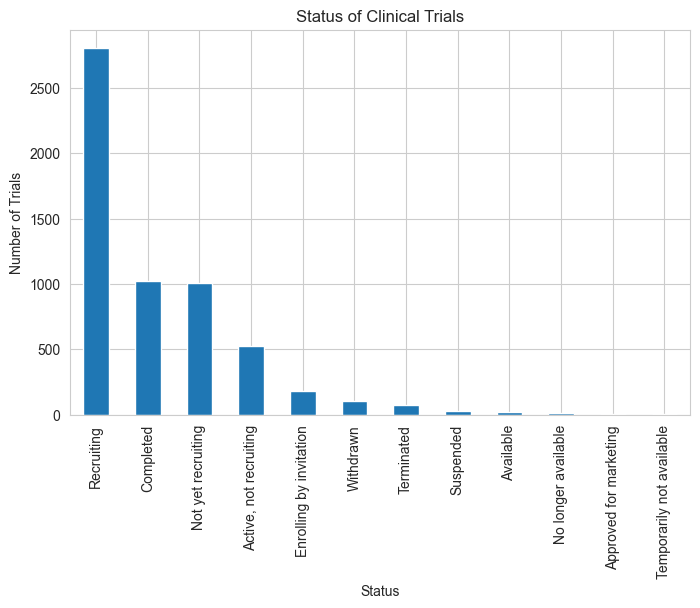

In [5]:
# Count of trials by Status
print(df['Status'].value_counts())

# Plot
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials', figsize=(8,5))
plt.ylabel('Number of Trials')
plt.show()


Phases
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


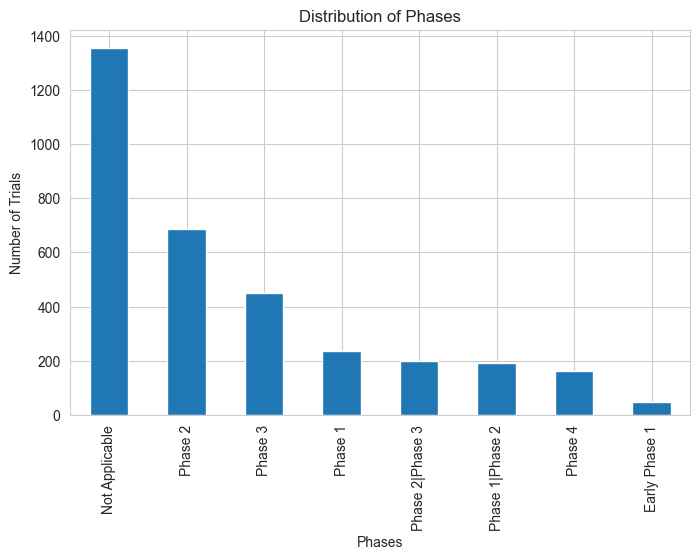

In [6]:
# Count of trials by Phases
print(df['Phases'].value_counts())

# Plot
df['Phases'].value_counts().plot(kind='bar', title='Distribution of Phases', figsize=(8,5))
plt.ylabel('Number of Trials')
plt.show()


Age
18 Years and older   (Adult, Older Adult)           2885
Child, Adult, Older Adult                            486
18 Years to 80 Years   (Adult, Older Adult)          221
18 Years to 65 Years   (Adult, Older Adult)          155
18 Years to 75 Years   (Adult, Older Adult)          135
                                                    ... 
15 Years to 45 Years   (Child, Adult)                  1
1 Month to 30 Years   (Child, Adult)                   1
21 Years to 40 Years   (Adult)                         1
11 Years and older   (Child, Adult, Older Adult)       1
8 Years to 20 Years   (Child, Adult)                   1
Name: count, Length: 417, dtype: int64


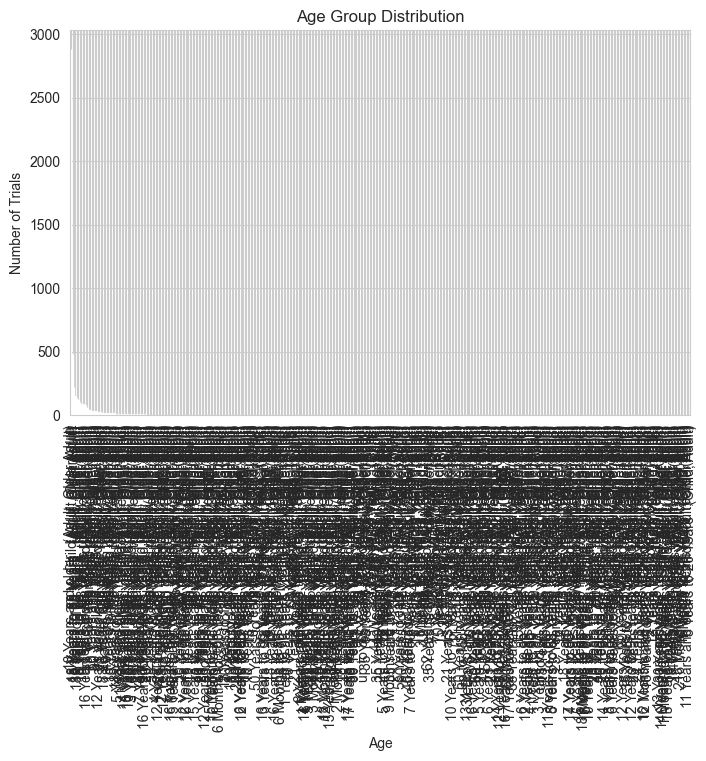

In [7]:
# Count of trials by Age
print(df['Age'].value_counts())

# Plot
df['Age'].value_counts().plot(kind='bar', title='Age Group Distribution', figsize=(8,5))
plt.ylabel('Number of Trials')
plt.show()


Phases                   Early Phase 1  Not Applicable  Phase 1  \
Status                                                            
Active, not recruiting               7             111       44   
Completed                            3             226       38   
Enrolling by invitation              4              54        1   
Not yet recruiting                   5             282       42   
Recruiting                          22             647       98   
Suspended                            2               2        0   
Terminated                           0              13        4   
Withdrawn                            3              19        7   

Phases                   Phase 1|Phase 2  Phase 2  Phase 2|Phase 3  Phase 3  \
Status                                                                        
Active, not recruiting                26       81               15       59   
Completed                             17       78               20       56   
Enrolling by 

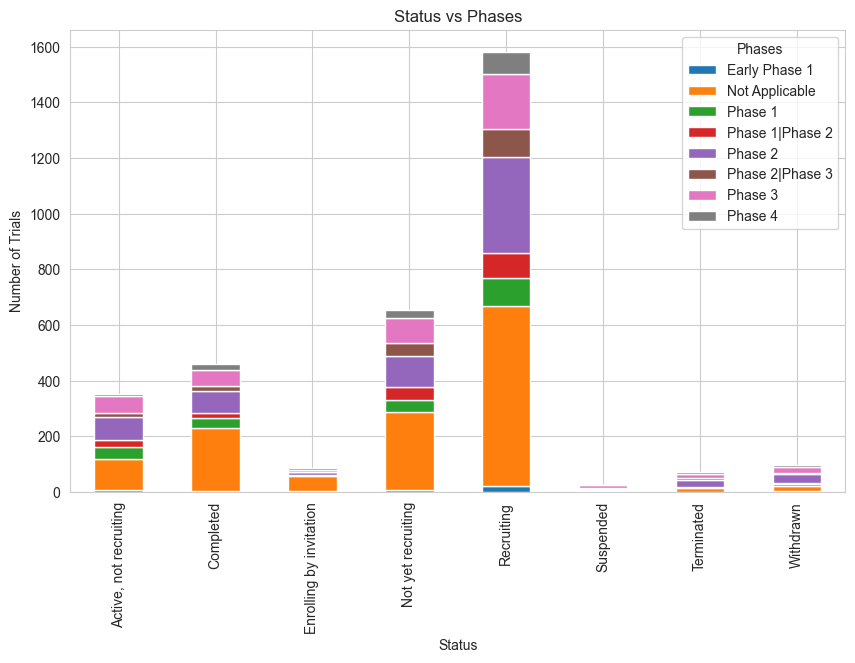

In [8]:
# Crosstab of Status vs Phases
status_phase = pd.crosstab(df['Status'], df['Phases'])
print(status_phase)

# Stacked bar plot
status_phase.plot(kind='bar', stacked=True, figsize=(10,6), title='Status vs Phases')
plt.ylabel('Number of Trials')
plt.show()
    

In [9]:
# Group conditions and list outcome measures
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
print(conditions_outcomes.head())


                                          Conditions  \
0                             2019 Novel Coronavirus   
1                   2019 Novel Coronavirus Infection   
2  2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                   2019 Novel Coronavirus Pneumonia   
4          2019 Novel Coronavirus Pneumonia|COVID-19   

                                    Outcome Measures  
0  Proportion of participants who improve by at l...  
1  new-onset COVID-19|Number of Participants with...  
2  Number of participants with treatment emergent...  
3  Clinical recovery time|Complete fever time|Cou...  
4  Pneumonia severity index|Oxygenation index (Pa...  


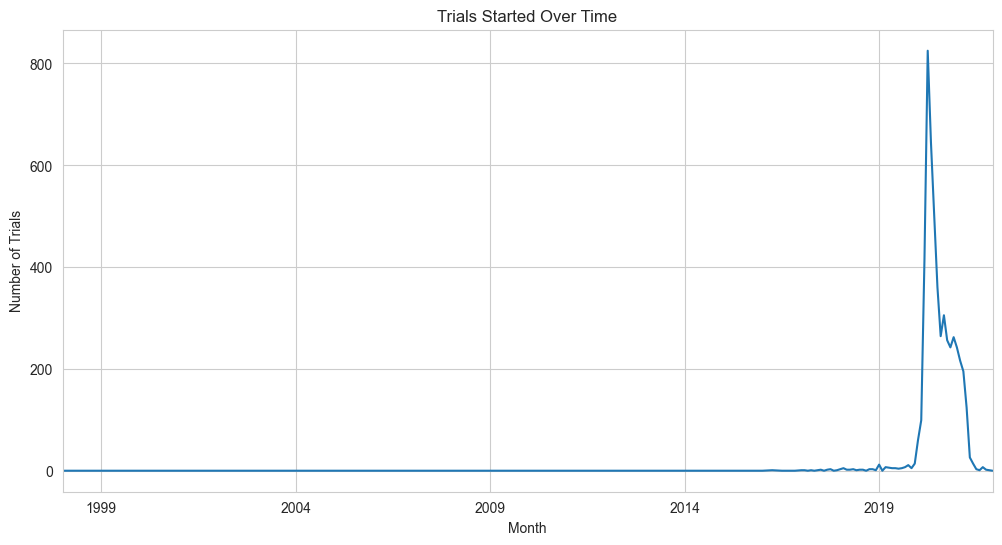

In [10]:
# Convert date columns to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

# Number of trials started over time
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(12,6), title='Trials Started Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Trials')
plt.show()
